In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 4.7 MB/s eta 0:00:00


In [ ]:
import praw
import time
from datetime import datetime
import sqlite3

# Авторизація через Reddit API
reddit = praw.Reddit(
    client_id="_________________________",
    client_secret="__________________________",
    user_agent="lab_3 by /u/Aggressive_Issue5530"
)

In [100]:
try:
    subreddit = reddit.subreddit("ukraine")
    posts = list(subreddit.new(limit=1000))


    for post in posts:
        created = datetime.utcfromtimestamp(post.created_utc).strftime('%Y-%m-%d %H:%M:%S')
        print(f"id: {post.id}")
        time.sleep(0.2)
        print(f"Title: {post.title}")
        time.sleep(0.2)
        print(f"Author: {post.author}")
        time.sleep(0.2)
        print(f"Created: {created}")
        time.sleep(0.2)
        print(f"Score: {post.score}")
        time.sleep(0.2)
        print(f"num_comments: {post.num_comments}")
        time.sleep(0.2)
        print(f"post url: {post.url}")
        print("-----")
except Exception as e:
    print("Помилка при пошуку:", e)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Показано результат, скорочений до останніх рядків (5000).
Title: Ukrainian defenders received 15 Sych UAVs from the KOLO Foundation
Author: Mil_in_ua
Created: 2025-05-14 14:12:12
Score: 108
num_comments: 1
post url: https://militarnyi.com/en/news/ukrainian-defenders-received-15-sych-uavs-from-the-kolo-foundation/
-----
id: 1kmg4rx
Title: Yielding Crimea Would Weigh Heavy on Ukraine
Author: CEPAORG
Created: 2025-05-14 14:09:54
Score: 323
num_comments: 32
post url: https://cepa.org/article/yielding-crimea-would-weigh-heavy-on-ukraine/
-----
id: 1kme41l
Title: Over 3,700 people in frontline communities of Kharkiv Oblast need evacuation because of Russian air attacks on civilians
Author: Jumpy-General-3859
Created: 2025-05-14 12:38:56
Score: 69
num_comments: 1
post url: https://gwaramedia.com/en/over-3700-people-in-frontline-communities-of-kharkiv-oblast-need-evacuation-because-of-russian-air-attacks-on-civilians/
-----
id: 1kmdmr7
Title: Over 70% of Ukrainians do not support elections dur

In [101]:

conn = sqlite3.connect("reddit_posts2.db")
cursor = conn.cursor()

cursor.execute("""
    CREATE TABLE IF NOT EXISTS posts (
        id TEXT PRIMARY KEY,
        title TEXT,
        author TEXT,
        date TEXT,
        score INTEGER,
        num_comments INTEGER,
        url TEXT,
        keyword TEXT
    )
""")

conn.commit()

In [102]:
cursor.execute("PRAGMA table_info(posts);")
columns = cursor.fetchall()
for col in columns:
    print(col)

(0, 'id', 'TEXT', 0, None, 1)
(1, 'title', 'TEXT', 0, None, 0)
(2, 'author', 'TEXT', 0, None, 0)
(3, 'date', 'TEXT', 0, None, 0)
(4, 'score', 'INTEGER', 0, None, 0)
(5, 'num_comments', 'INTEGER', 0, None, 0)
(6, 'url', 'TEXT', 0, None, 0)
(7, 'keyword', 'TEXT', 0, None, 0)


In [103]:
keyword = "war"
for post in posts:
    post_id = post.id
    title = post.title
    author = str(post.author)
    created = datetime.utcfromtimestamp(post.created_utc).strftime('%Y-%m-%d %H:%M:%S')
    score = post.score
    comments = post.num_comments
    url = post.url

    try:
        cursor.execute("""
            INSERT INTO posts (id, title, author, date, score, num_comments, url, keyword)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?)
        """, (post_id, title, author, created, score, comments, url, keyword))
    except Exception as e:
        print("Ошибка при вставке:", e)

conn.commit()

In [104]:
cursor.execute("SELECT * FROM posts limit 100")
rows = cursor.fetchall()
print("📋 Данные из таблицы:")
for row in rows:
    print(row)

📋 Данные из таблицы:
('1krxxkr', 'Children sell handmade jewelry to support the Armed Forces of Ukraine', 'UNITED24Media', '2025-05-21 13:32:35', 97, 2, 'https://v.redd.it/20bsy5aw052f1', 'war')
('1krxn6v', 'Pope Leo XIV Reaffirms Vatican’s Readiness to Host Ukraine-Russia Peace Negotiations', 'UNITED24Media', '2025-05-21 13:19:34', 21, 1, 'https://united24media.com/latest-news/pope-leo-xiv-reaffirms-vaticans-readiness-to-host-ukraine-russia-peace-negotiations-8548', 'war')
('1krxesn', 'Targeted Electronics Plant Fulfilled Over 2,000 Orders for Russian Defense Industry', 'Mil_in_ua', '2025-05-21 13:08:50', 63, 3, 'https://militarnyi.com/en/news/targeted-electronics-plant-fulfilled-over-2-000-orders-for-russian-defense-industry/', 'war')
('1krwmlh', 'Romanian President-Elect Nicușor Dan Offers Operational Backing for Ukraine Contingent', 'UNITED24Media', '2025-05-21 12:30:54', 109, 4, 'https://united24media.com/latest-news/romanian-president-elect-nicusor-dan-offers-operational-backing-

In [105]:
import pandas as pd

conn = sqlite3.connect('reddit_posts2.db')
query = "SELECT * FROM posts order by score desc"
df = pd.read_sql_query(query, conn)
df


,id,title,author,date,score,num_comments,url,keyword
0,1kfj5cw,"When Zelensky was in Prague, he noticed Ukrain...",ownworldman,2025-05-05 18:33:56,17198,195,https://i.redd.it/xqeqww03c0ze1.jpeg,war
1,1kh1zar,Swampy one of the best EOD technicians in Ukra...,mateiescu,2025-05-07 16:40:03,13688,237,https://i.redd.it/dy32778l1eze1.jpeg,war
2,1kmajzm,Beware of the Russians who bring peace,A_Lazko,2025-05-14 09:04:00,11524,157,https://i.redd.it/0e4mbx1jqp0f1.jpeg,war
3,1kk3z7d,"Pope Leo XIV, in his address today, calls for ...",vectorix108,2025-05-11 15:43:54,10158,115,https://v.redd.it/chfq53n7b60f1,war
4,1kfv20h,Daniel Kovalchuk died. Rest in peace hero.,HarakenQQ,2025-05-06 03:34:02,9999,107,https://i.redd.it/2etzr0zf03ze1.jpeg,war
...,...,...,...,...,...,...,...,...
973,1keme9e,War memorabilia/trophies in support,coilsfromthedead,2025-05-04 15:24:49,8,3,https://www.reddit.com/r/ukraine/comments/1kem...,war
974,1ki1mvj,"Ніколи не проходив медогляд, тож не маю війскь...",ConsaiderCordo,2025-05-08 21:22:08,7,3,https://www.reddit.com/r/ukraine/comments/1ki1...,war
975,1kl2wto,what is the song or the artist in this music?,MildlyBear,2025-05-12 20:22:04,3,0,https://youtu.be/-sRxviQcvIk?t=2232,war
976,1kqcspr,Trump to speak to Putin with goal of reaching ...,NilsuBerk,2025-05-19 14:16:08,0,13,https://www.bbc.com/news/live/cz9y5xy81jqt,war


In [112]:
from collections import Counter
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


authors = []

for post in posts:
    authors.append(post.author.name if post.author else '[deleted]')

counter = Counter(authors)

for author, count in counter.items():
    if count > 10:
        print(f"{author}: {count} posts")

UNITED24Media: 117 posts
Mil_in_ua: 135 posts
KI_official: 57 posts
chrisdh79: 39 posts
CF_Siveryany: 11 posts
Jumpy-General-3859: 29 posts
SoftwareExact9359: 11 posts
MARTINELECA: 19 posts
Ukrainer_UA: 16 posts
UFL_Robin: 12 posts
Creol6969: 30 posts
olexiy_voronin: 14 posts
GermanDronePilot: 46 posts
AdSpecialist6598: 26 posts
TimesandSundayTimes: 13 posts


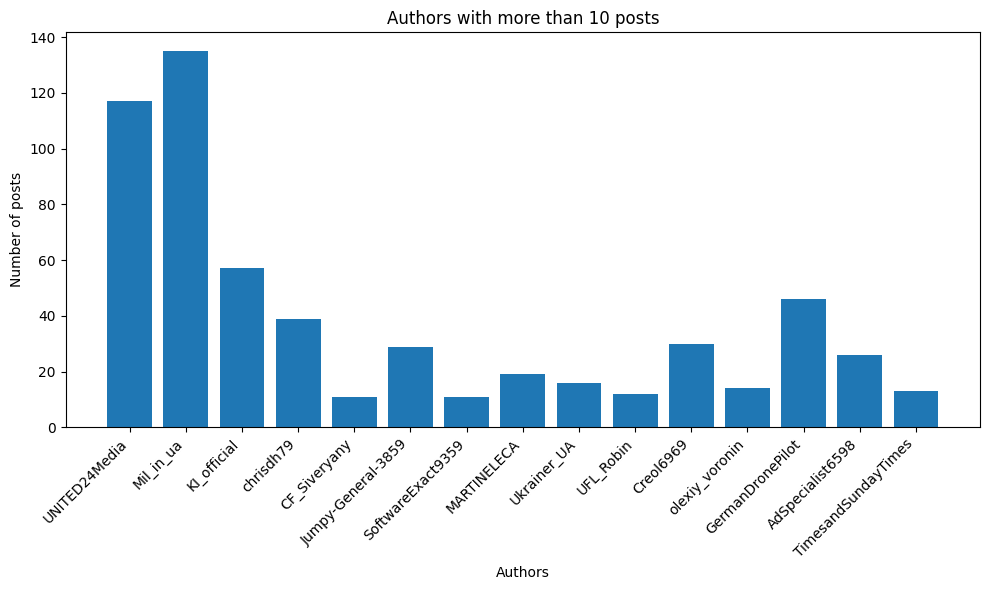

In [113]:
counter = Counter(authors)


filtered_authors = {author: count for author, count in counter.items() if count > 10}

names = list(filtered_authors.keys())
counts = list(filtered_authors.values())

plt.figure(figsize=(10,6))
plt.bar(names, counts)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Authors')
plt.ylabel('Number of posts')
plt.title('Authors with more than 10 posts')
plt.tight_layout()
plt.show()

In [126]:
trigger_words = [

    # Эмоциональные/резонансные слова
    "atrocity", "massacre", "genocide", "torture",
    "war crime", "crimes against humanity",
    "terror", "terrorist", "terrorism",
    "refugee", "displaced", "civilians killed", "children killed",

    # Военная терминология
    "counteroffensive", "advance", "retreat", "NATO", "air defense",
    "troops", "tank", "brigade", "mobilized", "draft", "conscription",
    "Kadyrov", "Wagner", "mercenaries",

    # Политически заряженные термины
    "Russia", "Putin", "Kremlin", "propaganda",
    "Zelenskyy", "Ukrainian army", "AFU",
    "denazification", "liberation",
    "occupied territories", "Donbas", "Crimea",

    # Дезинформация / паника
    "fake", "hoax", "false flag", "bio labs", "nuclear", "dirty bomb",
    "chemical weapons", "WW3", "world war"
]


mask = df["title"].apply(lambda x: any(word in x for word in trigger_words))


target_df = df[mask]

target_df[["author", "title", "url"]]


,author,title,url
2,A_Lazko,Beware of the Russians who bring peace,https://i.redd.it/0e4mbx1jqp0f1.jpeg
5,UNITED24Media,Ukrainian mayor gave up his POW swap so his si...,https://i.redd.it/9z4lrso68c0f1.jpeg
6,PjeterPannos,Oleksandr Matsiyevsky — the heroic Ukrainian s...,https://i.redd.it/s5ip094uoyze1.jpeg
7,UNITED24Media,Zelenskyy sends a clear message to Putin from ...,https://v.redd.it/dfp7yfe36y0f1
8,TheGreatPornholio123,Putin unveils new massively useless weapon...,https://v.redd.it/gumr9ywtxd0f1
...,...,...,...
947,UNITED24Media,Pope Leo XIV Reaffirms Vatican’s Readiness to ...,https://united24media.com/latest-news/pope-leo...
950,white1984,Putin loved this car. Now it drives Ukraine’s ...,https://youtu.be/_sBuCJgM28E?si=EjiKO2k4kDLwt1_9
956,Lion8330,"Murals with allusion to Makhno in Huliaipole, ...",https://www.youtube.com/watch?v=UskxO3seSqQ
961,Min_Min_Drops,What happens to the properties of civils in oc...,https://www.reddit.com/r/ukraine/comments/1kef...


In [131]:
top_authors = target_df.groupby('author').size().sort_values(ascending=True)
print(top_authors)

author
21_vetal_01              1
Accurate_Grab_2781       1
Andrei1958               1
Advanced-Injury-7186     1
BulkySunny               1
                        ..
chrisdh79               26
KI_official             36
GermanDronePilot        41
Mil_in_ua               52
UNITED24Media           64
Length: 102, dtype: int64


In [133]:
author_counts = target_df.groupby('author').size().reset_index(name='post_count')

# Фильтруем авторов с 1 или 2 постами
low_activity_authors = author_counts[author_counts['post_count'].isin([1, 2])]

filtered_df = target_df[target_df['author'].isin(low_activity_authors['author'])]

filtered_df[['author', 'title', 'url']]


,author,title,url
6,PjeterPannos,Oleksandr Matsiyevsky — the heroic Ukrainian s...,https://i.redd.it/s5ip094uoyze1.jpeg
8,TheGreatPornholio123,Putin unveils new massively useless weapon...,https://v.redd.it/gumr9ywtxd0f1
16,Glavurdan,Trump: Russia will have to give up all of Ukraine,https://babel.ua/en/news/117703-trump-russia-w...
19,ijnfrt,A Russian soldier films the moment his group i...,https://v.redd.it/m4t5svcb3i0f1
27,Practical-Pea-1205,Majority of Americans support weapon delieveri...,https://kyivindependent.com/majority-of-americ...
...,...,...,...
921,Due_Search_8040,Situation Report: Ceasefire Negotiations with ...,https://www.opforjournal.com/p/situation-repor...
939,Turborapt0r,What destroyed orc tanks are on display in Kyi...,https://www.reddit.com/r/ukraine/comments/1klh...
950,white1984,Putin loved this car. Now it drives Ukraine’s ...,https://youtu.be/_sBuCJgM28E?si=EjiKO2k4kDLwt1_9
961,Min_Min_Drops,What happens to the properties of civils in oc...,https://www.reddit.com/r/ukraine/comments/1kef...
